In [1]:


import os  
from os.path import join, split, exists,dirname
import numpy as np 
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(0,dirname(os.getcwd()))
import yaml
from tqdm import  tqdm
from utils.metric_util import  * 
import torch

from semantic_kitti_api.entity.semantic_kitti_gt_loader import * 
from semantic_kitti_api.entity.prediction_loader import * 
from risk_coverage_curve_utils.risk_coverage_curve_ploter import *
from risk_coverage_curve_utils.risk_coverage_curve_aupr_auroc_ploter import *


%matplotlib inline


os.chdir(dirname(os.getcwd()))
os.getcwd()

'/home/DISCOVER_summer2022/xusc/exp/openset_anomaly_detection'

## Risk (1 - mIoU )-Coverage Curve

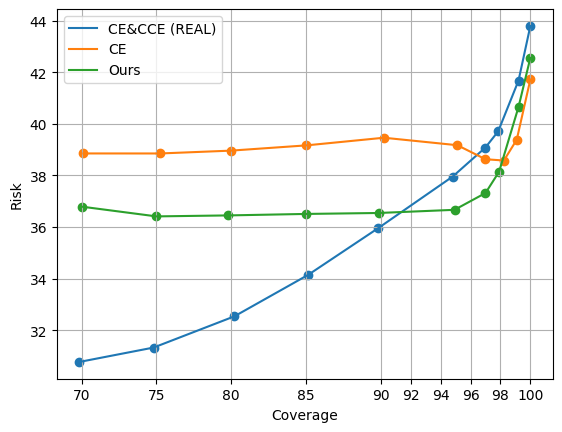

In [6]:
'''
Author: daniel
Date: 2023-08-17 21:51:25
LastEditTime: 2023-08-18 20:10:24
LastEditors: daniel
Description: 
FilePath: /openset_anomaly_detection/jupyter/risk_coverage.ipynb
have a nice day
'''


# kitti_aupr45_ploter = RiskCoveragePloter('runs/backup/kitti_aupr45/coverage_VS_err2.csv')
# kitti_aupr45_ploter(legend='yang_best')



# energy_abstain_ploter = RiskCoveragePloter('runs/model_archive/main_contribution_ablation/energy#abstein#aupr41#ep34/energy#abstein#aupr41#ep34/coverage_VS_err2.csv')
# energy_abstain_S_ploter = RiskCoveragePloter('runs/model_archive/main_contribution_ablation/energy#abstain#S#aupr43#ep34/energy#abstain#S#aupr43#ep34/coverage_VS_err2.csv')
# energy_abstain_S_no_resize_ploter = RiskCoveragePloter('runs/model_archive/synthesis_ablation/energy#abstein#S#aupr27#ep23#no_resize_synthesis/coverage_VS_err2.csv')
# energy_abstein_S_dynamic_ploter = RiskCoveragePloter('runs/model_archive/main_contribution_ablation/energy#abstein#S#dynamic#aupr44#ep34/energy#abstein#S#dynamic#aupr44#ep34/coverage_VS_err2.csv')



# * main ablation
# energy_abstain_ploter(legend='Energy&Abstention')
# energy_abstain_S_ploter(legend='Energy&Abstention&ShapeNet')
# energy_abstein_S_dynamic_ploter(legend='Energy&Abstention&ShapeNet&DynamicMOut')






# energy_abstain_ploter(legend='Resize Synthesis')
# energy_abstain_S_no_resize_ploter(legend='ShapeNet Synthesis')
# energy_abstain_S_ploter(legend='All Synthesis')




ce_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#aupr24#ep11/coverage_VS_err_aupr_auroc1.csv')
ce_cce_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#cce#aupr21#ep4/coverage_VS_err_aupr_auroc1.csv')
# ce_cce_s_ploter = RiskCoveragePloter('runs/model_archive/real_ablation/ce#cce#s#aupr23#ep1/coverage_VS_err2.csv')

energy_abstein_S_dynamic_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstein#S#dynamic#aupr44#ep34/energy#abstein#S#dynamic#aupr44#ep34/coverage_VS_err_aupr_auroc1.csv')
ce_cce_ploter(legend='CE&CCE (REAL)')
ce_ploter(legend='CE')
# ce_cce_s_ploter(legend='CE&CCE&ShapeNet')
energy_abstein_S_dynamic_ploter(legend='Ours')


plt.xticks(list(range(70,91,5)) + list(range(92,102,2)))
plt.grid(True)
plt.xlabel('Coverage')
plt.ylabel('Risk')

plt.savefig('prove.png', dpi=300,bbox_inches='tight')
# plt.show()


        

In [39]:

for idx,(x,y) in enumerate(zip(ce_cce_ploter.risks,energy_abstein_S_dynamic_ploter.risks)):
    if x <= y: 
        print('risks',ce_cce_ploter.risks[idx],energy_abstein_S_dynamic_ploter.risks[idx])
        # print('aupr',ce_cce_ploter.aupr[idx],energy_abstein_S_dynamic_ploter.aupr[idx])
        # print('auroc',ce_cce_ploter.auroc[idx],energy_abstein_S_dynamic_ploter.auroc[idx])
        print('thresholds',ce_cce_ploter.thresholds[idx],energy_abstein_S_dynamic_ploter.thresholds[idx])
        print('coverage',ce_cce_ploter.actual_coverages[idx],energy_abstein_S_dynamic_ploter.actual_coverages[idx])
        print("======================================================================")
        
        
    pass


risks 29.877 36.788
thresholds 0.024 0.0008712988346815109
coverage 70.16 70.0
risks 30.783000000000005 36.41
thresholds 0.034 0.001239180564880371
coverage 74.85 75.0
risks 32.267 36.448
thresholds 0.047 0.0018024444580078125
coverage 80.04 79.8
risks 34.122 36.504999999999995
thresholds 0.062 0.0028839111328125
coverage 85.04 84.97
risks 36.246 36.541999999999994
thresholds 0.076 0.005126953125
coverage 90.19 89.85


### Synthesis Ablation

Text(0, 0.5, 'Risk')

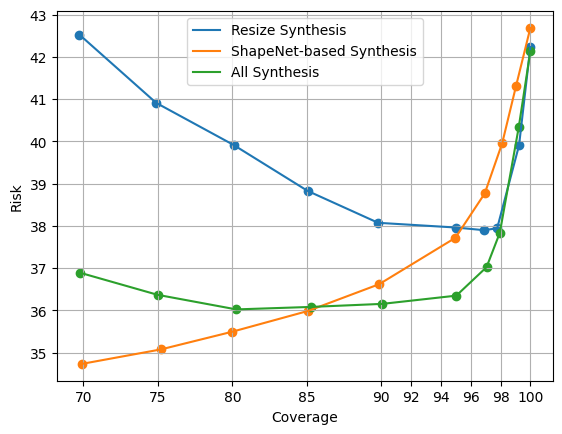

In [5]:

energy_abstain_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstein#aupr41#ep34/energy#abstein#aupr41#ep34/coverage_VS_err_aupr_auroc1.csv')
energy_abstain_S_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstain#S#aupr43#ep34/energy#abstain#S#aupr43#ep34/coverage_VS_err_aupr_auroc1.csv')
energy_abstain_S_no_resize_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/synthesis_ablation/energy#abstein#S#aupr27#ep23#no_resize_synthesis/coverage_VS_err_aupr_auroc1.csv')

plt.xticks(list(range(70,91,5)) + list(range(92,102,2)))
plt.grid(True)


#* main ablation
energy_abstain_ploter(legend='Resize Synthesis')
energy_abstain_S_no_resize_ploter(legend='ShapeNet-based Synthesis')
energy_abstain_S_ploter(legend='All Synthesis')
plt.xlabel('Coverage')
plt.ylabel('Risk')
# plt.savefig('synthesis_ablation_risk2.png', dpi=300,bbox_inches='tight')




# energy_abstain_ploter.threashold_coverage_curve(legend='Resize Synthesis')
# energy_abstain_S_no_resize_ploter.threashold_coverage_curve(legend='ShapeNet Synthesis')
# energy_abstain_S_ploter.threashold_coverage_curve(legend='All Synthesis')
# plt.xlabel('Coverage')
# plt.ylabel('Threashold')
# plt.savefig('synthesis_ablation_threashold.png', dpi=300,bbox_inches='tight')



# energy_abstain_ploter.aupr_coverage_curve(legend='Resize Synthesis')
# energy_abstain_S_no_resize_ploter.aupr_coverage_curve(legend='ShapeNet Synthesis')
# energy_abstain_S_ploter.aupr_coverage_curve(legend='All Synthesis')
# plt.xlabel('Coverage')
# plt.ylabel('AUPR')
# plt.savefig('synthesis_ablation_aupr.png', dpi=300,bbox_inches='tight')




# energy_abstain_ploter.auroc_coverage_curve(legend='Resize Synthesis')
# energy_abstain_S_no_resize_ploter.auroc_coverage_curve(legend='ShapeNet Synthesis')
# energy_abstain_S_ploter.auroc_coverage_curve(legend='All Synthesis')
# plt.xlabel('Coverage')
# plt.ylabel('AUROC')
# plt.savefig('synthesis_ablation_auroc.png', dpi=300,bbox_inches='tight')

### main module ablation 

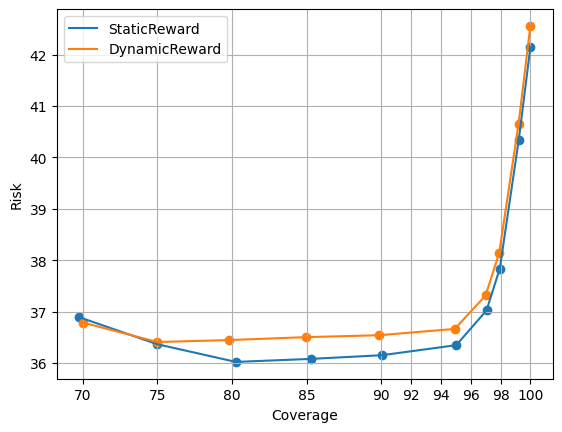

In [4]:

energy_abstain_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstein#aupr41#ep34/energy#abstein#aupr41#ep34/coverage_VS_err_aupr_auroc1.csv')
energy_abstain_S_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstain#S#aupr43#ep34/energy#abstain#S#aupr43#ep34/coverage_VS_err_aupr_auroc1.csv')
energy_abstein_S_dynamic_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstein#S#dynamic#aupr44#ep34/energy#abstein#S#dynamic#aupr44#ep34/coverage_VS_err_aupr_auroc1.csv')

plt.xticks(list(range(70,91,5)) + list(range(92,102,2)))
plt.grid(True)



# * main ablation
# energy_abstain_ploter(legend='StaticReward')
# energy_abstain_S_ploter(legend='StaticReward&ShapeNet')
# energy_abstein_S_dynamic_ploter(legend='DynamicReward&ShapeNet')
energy_abstain_S_ploter(legend='StaticReward')
energy_abstein_S_dynamic_ploter(legend='DynamicReward')
plt.ylabel('Risk')
plt.xlabel('Coverage')
plt.savefig('reward_ablaiton_new.png', dpi=300,bbox_inches='tight')


# energy_abstain_ploter.threashold_coverage_curve(legend='Energy&Abstention')
# energy_abstain_S_ploter.threashold_coverage_curve(legend='Energy&Abstention&ShapeNet')
# energy_abstein_S_dynamic_ploter.threashold_coverage_curve(legend='Energy&Abstention&ShapeNet&DynamicMOut')
# plt.xlabel('Coverage')
# plt.ylabel('Threashold')
# plt.savefig('main_module_ablation_threashold.png', dpi=300,bbox_inches='tight')



# energy_abstain_ploter.aupr_coverage_curve(legend='Energy&Abstention')
# energy_abstain_S_ploter.aupr_coverage_curve(legend='Energy&Abstention&ShapeNet')
# energy_abstein_S_dynamic_ploter.aupr_coverage_curve(legend='Energy&Abstention&ShapeNet&DynamicMOut')
# plt.xlabel('Coverage')
# plt.ylabel('AUPR')
# plt.savefig('main_module_ablation_aupr.png', dpi=300,bbox_inches='tight')




# energy_abstain_ploter.auroc_coverage_curve(legend='Energy&Abstention')
# energy_abstain_S_ploter.auroc_coverage_curve(legend='Energy&Abstention&ShapeNet')
# energy_abstein_S_dynamic_ploter.auroc_coverage_curve(legend='Energy&Abstention&ShapeNet&DynamicMOut')
# plt.xlabel('Coverage')
# plt.ylabel('AUROC')
# plt.savefig('main_module_ablation_auroc.png', dpi=300,bbox_inches='tight')
# plt.show()


### supplementary_ablation_for_REAL

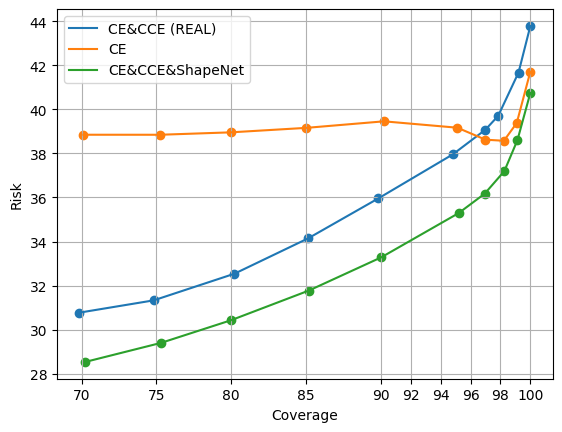

In [3]:

ce_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#aupr24#ep11/coverage_VS_err_aupr_auroc1.csv')
ce_cce_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#cce#aupr21#ep4/coverage_VS_err_aupr_auroc1.csv')
ce_cce_s_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#cce#s#aupr23#ep1/coverage_VS_err_aupr_auroc1.csv')


plt.xticks(list(range(70,91,5)) + list(range(92,102,2)))
plt.grid(True)



ce_cce_ploter(legend='CE&CCE (REAL)')
ce_ploter(legend='CE')
ce_cce_s_ploter(legend='CE&CCE&ShapeNet')
plt.xlabel('Coverage')
plt.ylabel('Risk')
plt.savefig('supplementary_ablation_for_REAL_risk.png', dpi=300,bbox_inches='tight')


# ce_cce_ploter.threashold_coverage_curve(legend='CE&CCE (REAL)')
# ce_ploter.threashold_coverage_curve(legend='CE')
# ce_cce_s_ploter.threashold_coverage_curve(legend='CE&CCE&ShapeNet')
# plt.xlabel('Coverage')
# plt.ylabel('Threashold')
# plt.savefig('supplementary_ablation_for_REAL_threashold.png', dpi=300,bbox_inches='tight')


# ce_cce_ploter.aupr_coverage_curve(legend='CE&CCE (REAL)')
# ce_ploter.aupr_coverage_curve(legend='CE')
# ce_cce_s_ploter.aupr_coverage_curve(legend='CE&CCE&ShapeNet')
# plt.xlabel('Coverage')
# plt.ylabel('AUPR')
# plt.savefig('supplementary_ablation_for_REAL_aupr.png', dpi=300,bbox_inches='tight')

# ce_cce_ploter.auroc_coverage_curve(legend='CE&CCE (REAL)')
# ce_ploter.auroc_coverage_curve(legend='CE')
# ce_cce_s_ploter.auroc_coverage_curve(legend='CE&CCE&ShapeNet')
# plt.xlabel('Coverage')
# plt.ylabel('AUROC')
# plt.savefig('supplementary_ablation_for_REAL_auroc.png', dpi=300,bbox_inches='tight')

# plt.show()



### SOTA comparison

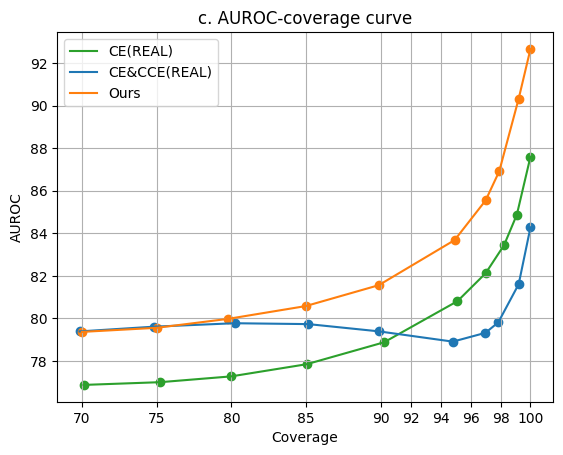

In [2]:


# kitti_aupr45_ploter = RiskCoveragePloter('runs/backup/kitti_aupr45/coverage_VS_err_aupr_auroc1.csv')
# ce_cce_ploter = RiskCoveragePloter('runs/model_archive/real_ablation/ce#cce#aupr21#ep4/coverage_VS_err2.csv')
# ce_ploter = RiskCoveragePloter('runs/model_archive/real_ablation/ce#aupr24#ep11/coverage_VS_err2.csv')
# ce_cce_ploter = RiskCoveragePloter('runs/model_archive/real_ablation/ce#cce#aupr21#ep4/coverage_VS_err2.csv')
# energy_abstein_S_dynamic_ploter = RiskCoveragePloter('runs/model_archive/main_contribution_ablation/energy#abstein#S#dynamic#aupr44#ep34/energy#abstein#S#dynamic#aupr44#ep34/coverage_VS_err2.csv')



ce_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#aupr24#ep11/coverage_VS_err_aupr_auroc1.csv')
ce_cce_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/real_ablation/ce#cce#aupr21#ep4/coverage_VS_err_aupr_auroc1.csv')
energy_abstein_S_dynamic_ploter = RiskCoverageCurveAUPRAUROCPloter('runs/model_archive/main_contribution_ablation/energy#abstein#S#dynamic#aupr44#ep34/energy#abstein#S#dynamic#aupr44#ep34/coverage_VS_err_aupr_auroc1.csv')

plt.xticks(list(range(70,91,5)) + list(range(92,102,2)))
plt.grid(True)


# kitti_aupr45_ploter.threashold_coverage_curve(legend='yang_best')
# ce_ploter.threashold_coverage_curve(legend='CE(REAL)',color='#2ca02c')
# ce_cce_ploter.threashold_coverage_curve(legend='CE&CCE(REAL)',color='#1f77b4')
# energy_abstein_S_dynamic_ploter.threashold_coverage_curve(legend='Ours',color='#ff7f0e')


# plt.ylabel('Threashold')
# plt.xlabel('Coverage')
# plt.title('d. Threshold-coverage curve')
# plt.savefig('sota_comparison_threashold.png', dpi=300,bbox_inches='tight')


# kitti_aupr45_ploter(legend='yang_best')
# ce_ploter(legend='CE(REAL)',color='#2ca02c')
# ce_cce_ploter(legend='CE&CCE(REAL)',color='#1f77b4')
# energy_abstein_S_dynamic_ploter(legend='Ours',color='#ff7f0e')
# plt.xlabel('Coverage')
# plt.ylabel('Risk')
# plt.title('a. Risk-coverage curve')
# plt.savefig('sota_comparison_risk.png', dpi=300,bbox_inches='tight')
# plt.savefig('sota_comparison_risk_teaser.png', dpi=300,bbox_inches='tight')

# ce_ploter.aupr_coverage_curve(legend='CE(REAL)',color='#2ca02c')
# ce_cce_ploter.aupr_coverage_curve(legend='CE&CCE(REAL)',color='#1f77b4')
# energy_abstein_S_dynamic_ploter.aupr_coverage_curve(legend='Ours',color='#ff7f0e')
# plt.xlabel('Coverage')
# plt.ylabel('AUPR')
# plt.title('b. AUPR-coverage curve')
# plt.savefig('sota_comparison_aupr.png', dpi=300,bbox_inches='tight')
# plt.savefig('sota_comparison_aupr_teaser.png', dpi=300,bbox_inches='tight')


ce_ploter.auroc_coverage_curve(legend='CE(REAL)',color='#2ca02c')
ce_cce_ploter.auroc_coverage_curve(legend='CE&CCE(REAL)',color='#1f77b4')
energy_abstein_S_dynamic_ploter.auroc_coverage_curve(legend='Ours',color='#ff7f0e')
plt.xlabel('Coverage')
plt.ylabel('AUROC')
plt.title('c. AUROC-coverage curve')
plt.savefig('sota_comparison_auroc.png', dpi=300,bbox_inches='tight')
# plt.savefig('sota_comparison_auroc_teaser.png', dpi=300,bbox_inches='tight')



# plt.show()


In [23]:
for idx,(x,y,z) in enumerate(zip(ce_cce_ploter.risks,energy_abstein_S_dynamic_ploter.risks,ce_ploter.risks)):
    if x >= y: 
        print('risks',ce_cce_ploter.risks[idx],energy_abstein_S_dynamic_ploter.risks[idx],ce_ploter.risks[idx])
        print('aupr',ce_cce_ploter.aupr[idx],energy_abstein_S_dynamic_ploter.aupr[idx],ce_ploter.aupr[idx])
        print('auroc',ce_cce_ploter.auroc[idx],energy_abstein_S_dynamic_ploter.auroc[idx],ce_ploter.auroc[idx])
        print('thresholds',ce_cce_ploter.thresholds[idx],energy_abstein_S_dynamic_ploter.thresholds[idx],ce_ploter.thresholds[idx])

        print("======================================================================")
        
        
    pass


risks 37.956 36.665000000000006 39.169
aupr 3.763 3.711 4.504
auroc 78.906 83.681 80.81
thresholds 0.08673095703125 0.013671875 0.00128173828125
risks 39.077 37.316 38.625
aupr 4.487 6.092 6.034
auroc 79.32 85.544 82.12
thresholds 0.09912109375 0.03125 0.0029296875
risks 39.708 38.141999999999996 38.576
aupr 5.176 9.007 8.228
auroc 79.814 86.912 83.438
thresholds 0.109375 0.0625 0.0078125
risks 41.677 40.65299999999999 39.383
aupr 8.898 25.437 11.978
auroc 81.605 90.324 84.878
thresholds 0.25 0.5 0.03125
risks 43.793000000000006 42.557 41.717999999999996
aupr 18.627 44.529 26.676
auroc 84.282 92.666 87.602
thresholds 1.0 1.0 1.0


array([30.15, 25.19, 19.79, 14.86, 10.16,  5.19,  3.01,  2.15,  0.79,
        0.  ])